In [8]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

import tensorflow as tf

In [62]:
a = tf.constant(10)
b = tf.constant(5)
c = a + b
c

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [63]:
a = tf.constant(10)
b = tf.constant(5)
c = a + b
with tf.Session() as sess:
    print(sess.run(c))

15


In [64]:
a = tf.placeholder(dtype=tf.float32, shape=[3, 1])
b = tf.placeholder(dtype=tf.float32, shape=[3, 1])
c = tf.matmul(tf.transpose(a), b)
with tf.Session() as sess:
    c_ = sess.run(c, feed_dict={a: np.array([1, 2, 3]).reshape(-1, 1), 
                                b: np.array([3, 7, 4]).reshape(-1, 1)})
    print("C", c_)

C [[ 29.]]


In [59]:
import requests
url = "https://raw.githubusercontent.com/abulbasar/machine-learning/master/Utils.py"
exec(requests.get(url).text)

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
y = df.Species
y.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

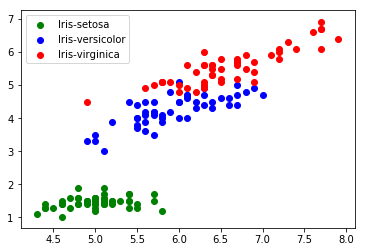

In [5]:
cmap = {"Iris-virginica": "red",
        "Iris-setosa": "green",
        "Iris-versicolor": "blue"}
colors = [cmap[c] for c in df.Species]

for i, v in enumerate(y.unique()):
    df2 = df[df.Species == v][features]
    plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], color = cmap[v], label = v)

plt.legend()

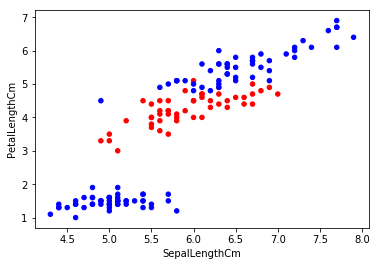

In [60]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                , y, test_size = 0.3, random_state = 123)

colors = np.where(y == 1, "red", "blue")
X.plot.scatter(features[0], features[1], color = colors)

scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [97]:
35/45

0.7777777777777778

X Tensor("Placeholder:0", shape=(?, 2), dtype=float32)
y Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
fulllayer_1W <tf.Variable 'fulllayer_1W:0' shape=(2, 3) dtype=float32_ref>
fulllayer_1b <tf.Variable 'Variable:0' shape=(3,) dtype=float32_ref>
fulllayer_2W <tf.Variable 'fulllayer_2W:0' shape=(3, 2) dtype=float32_ref>
fulllayer_2b <tf.Variable 'Variable_1:0' shape=(2,) dtype=float32_ref>
Z Tensor("add_1:0", shape=(?, 2), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
matching Tensor("Equal:0", shape=(?,), dtype=bool)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
0 training [0.625] testing [0.77777779] logloss 0.676616
200 training [0.9375] testing [0.95555556] logloss 0.123422
400 training [0.9375] testing [0.95555556] logloss 0.123157
600 training [0.9375] testing [0.95555556] logloss 0.123087
800 training [0.9375] testing [0.95555556] logloss 0.123028
1000 training [0.9375] testing [0.95555556] logloss 0.122992
1200 training [0.9375] testing [0.95555556

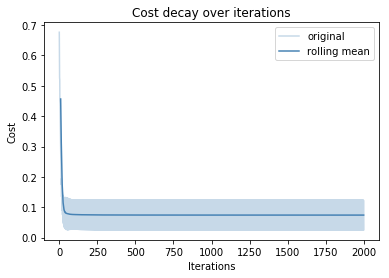

In [131]:
tf.reset_default_graph()
tf.set_random_seed(1)

n_x = 2
n_y = 2
learning_rate = 1e-1
max_iters = 2000

X = tf.placeholder(dtype=tf.float32, shape=[None, 2])
y = tf.placeholder(dtype= tf.int32, shape=[None])

y_oh = tf.one_hot(y,  n_y)

print("X", X)
print("y", y)

def full_layer(name, input, size, activation = None):
    input_size = int(input.get_shape()[1])
    #W = tf.Variable(tf.truncated_normal(shape=[input_size, size]))
    W = tf.get_variable(name + "W", shape = [input_size, size], 
                    initializer=tf.contrib.layers.xavier_initializer())
    b =  tf.Variable(tf.constant(0.0, shape=[size]))
    print(name + "W", W)
    print(name + "b", b)
    Z = tf.matmul(input, W) + b
    
    if callable(activation):
        Z = activation(Z)
        
    return Z

full_layer_1 = full_layer("fulllayer_1", X, 3, activation=tf.nn.relu)
full_layer_2 = full_layer("fulllayer_2", full_layer_1, n_y)
Z = full_layer_2
print("Z", Z)

y_pred = tf.argmax(Z, 1, output_type=tf.int32)
print("y_pred", y_pred)

matching = tf.equal(y, y_pred)
print("matching", matching)

accuracy = tf.reduce_mean(tf.cast(matching, tf.float32))
print("accuracy", accuracy)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_oh,
                                                logits=Z))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) 

scores = {}
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    batchable = Batchable(X=X_train_std, y= y_train, batch_size=64)
    
    for i in range(max_iters): 
        X_batch, y_batch = batchable.next()
        
        _, cost_, accuracy_ = sess.run([optimizer, cost, accuracy], 
                    feed_dict={X: X_batch, y: y_batch})
        scores[i] = cost_
        if i % (max_iters//10) == 0 or i == max_iters - 1:
            training_accuracy_ = sess.run([accuracy], 
                    feed_dict={X: X_batch, y: y_batch})
            testing_accuracy_ = sess.run([accuracy], 
                    feed_dict={X: X_test_std, y: y_test})
            print(i, 
                  "training", training_accuracy_, 
                  "testing", testing_accuracy_,
                  "logloss", cost_)
    
    plot_scores(scores)